In [75]:
from astropy.io import fits
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
#read in the values of the temperatures and densities
f = open("gns96multi.dat", "r")
topt=[] #list of temperatures
topd=[] #list of densities
line=f.readline()
while line!='':
    if line[1]=='E':
        topd.append(float(line[-11:-1]))
        topt.append(float(line[-24:-13]))   
    line=f.readline()
f.close()


f = open("gns96multi.dat", "r")
topd=np.unique(topd)
nd=len((topd))
topt=np.unique(topt)
nt=len((topt))
energy=np.zeros((nt,nd,49))
ross=np.zeros((nt,nd,49))
planck=np.zeros((nt,nd,49))

#read through the file until it gets
#to the multigroup opacities
line=f.readline()
while line[1]!='E':
    line=f.readline()

#read in the multigroup opacities for each
#temperautre and density
for countt in range(nt):
    line=f.readline()
    for countd in range(nd):
        for counte in range(49):
            if line[1]=='E':
                break
            e,r,p=(line.split())
            energy[countt,countd,counte]=float(e)
            ross[countt,countd,counte]=float(r)
            planck[countt,countd,counte]=float(p)
            line=f.readline()   
            
        line=f.readline()

In [147]:
#select a wanted temperature and density
wantrho=1e-13 #in g cm^-3
wanttemp=1.5e-2#in keV

#find the index of the XSTAR file with wanted temperature/density
tlist=np.logspace(np.log10(5e3),np.log10(1e6),100) #in kelvin
dlist=np.logspace(-15,-7,20) #in g cm^-3
i=np.argmin(abs(tlist-wanttemp*11604525.0061598))
j=np.argmin(abs(dlist-wantrho))
num=i*len(dlist)+j

#find the index of the TOPs file with wanted temperature/density
top_ind_temp=np.argmin(abs(wanttemp-topt))
top_ind_dens=np.argmin(abs(wantrho-topd))

In [148]:
#open XSTAR file and check the file values

dir_path='/Users/asecunda/Documents/thesis/radsims1/toyanfeiv2 (1)/work/'

hud = fits.open(dir_path+'/ares/opakout'+str(num)+'.fits')
names=hud[1].data['parameter']
print("Temperature:",hud[1].data['value'][names=='temperature'][0]*1e4)
print("Density:",hud[1].data['value'][names=='density'][0]*1.67e-24)
print("Pressure:",hud[1].data['value'][names=='pressure'][0])

Temperature: 170997.60055541992
Density: 1.274275004416e-13
Pressure: 6523891040124928.0


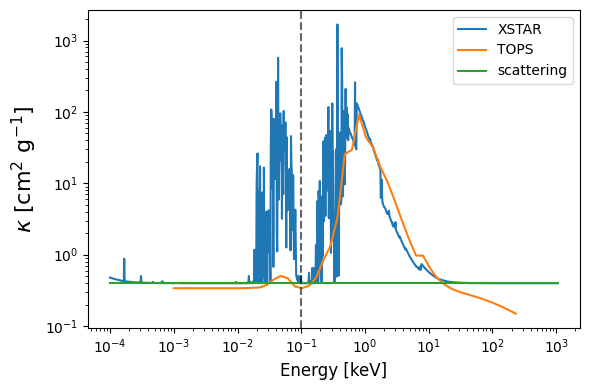

In [149]:
fig=plt.figure(figsize=(6,4)) 

rho=hud[1].data['value'][names=='density']*1.67e-24

plt.plot(hud[3].data['energy']/1000,(hud[3].data['opacity']+hud[3].data['scattering'])/rho,label='XSTAR')
plt.plot(energy[top_ind_temp,top_ind_dens],ross[top_ind_temp,top_ind_dens],label='TOPS')
plt.plot(hud[3].data['energy']/1000,(hud[3].data['scattering'])/rho,label='scattering')
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

plt.axvline(0.1,linestyle='dashed',color='black',alpha=0.6)

plt.xlabel('Energy [keV]',fontsize=12)
plt.ylabel(r'$\kappa$ [cm$^2~$g$^{-1}$]',fontsize=16)
plt.legend()
plt.tight_layout()

#plt.savefig('opex.pdf')